In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/used_cars1.csv")

In [5]:
df.head()

,brand,model,milage,fuel_type,transmission,price,Horsepower,Engine_Displacement,age
0,0.402929,0.008684,0.125710,0.257932,0.216726,0.122963,0.324859,0.398693,0.34375
1,0.207698,0.031384,0.085557,0.527514,0.515531,0.533407,0.369273,0.411765,0.09375
2,0.262440,0.013579,0.219313,0.798089,0.420744,0.200000,0.401130,0.372549,0.28125
3,0.385316,0.024392,0.207212,0.527514,0.216726,0.429630,0.313559,0.176471,0.21875
4,0.399841,0.005331,0.597431,0.527514,0.228822,0.078519,0.299435,0.490196,0.71875


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

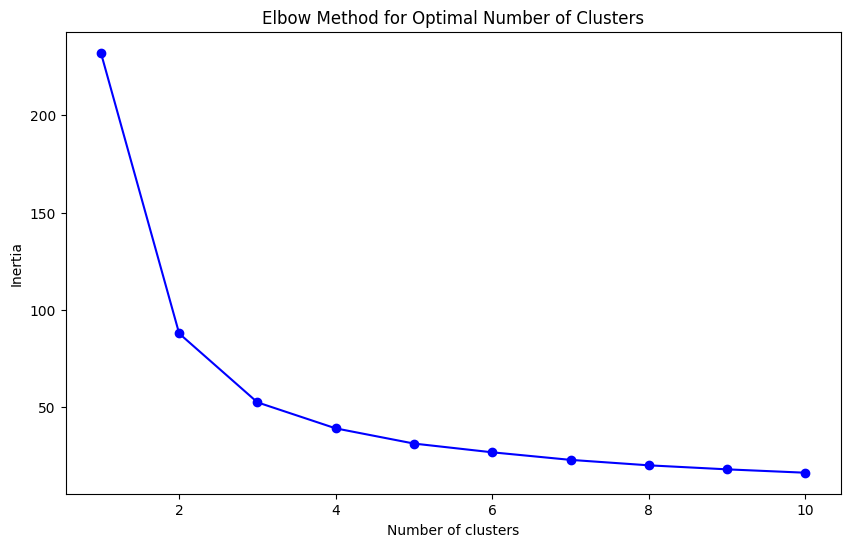

In [7]:
# Finding the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[['milage', 'price']])
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


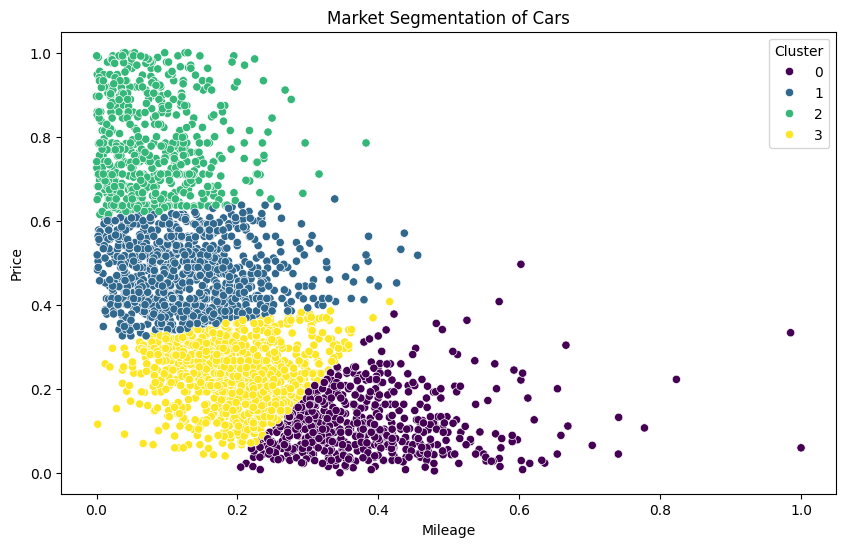

In [8]:
optimal_cluster = 4
kmeans = KMeans(n_clusters=optimal_cluster, random_state=0)

kmeans.fit(df[['milage', 'price']])

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Step 4: Visualization
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='milage', y='price', hue='Cluster', palette='viridis')
plt.title('Market Segmentation of Cars')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()